- resize 缩放图片大小
- translate 平移图片位置
- rotate 旋转图片
- filp 翻转图片
>
- translate
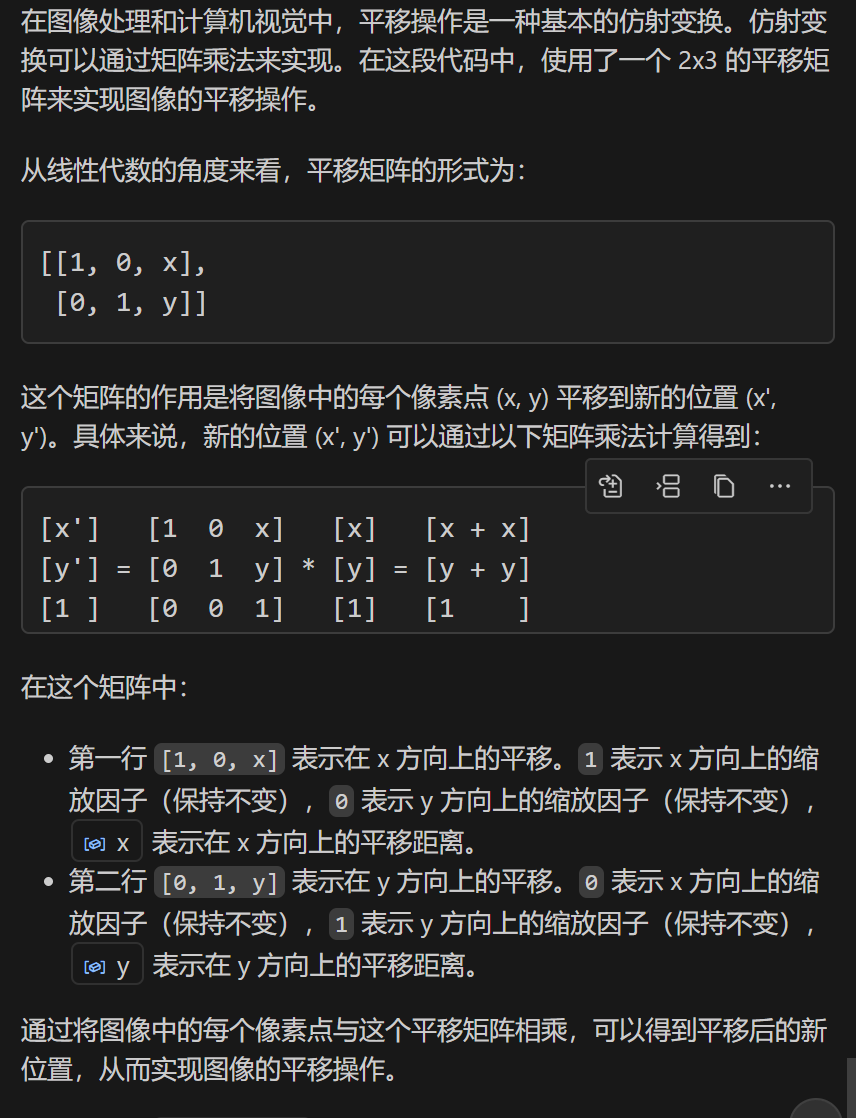
- 效果图
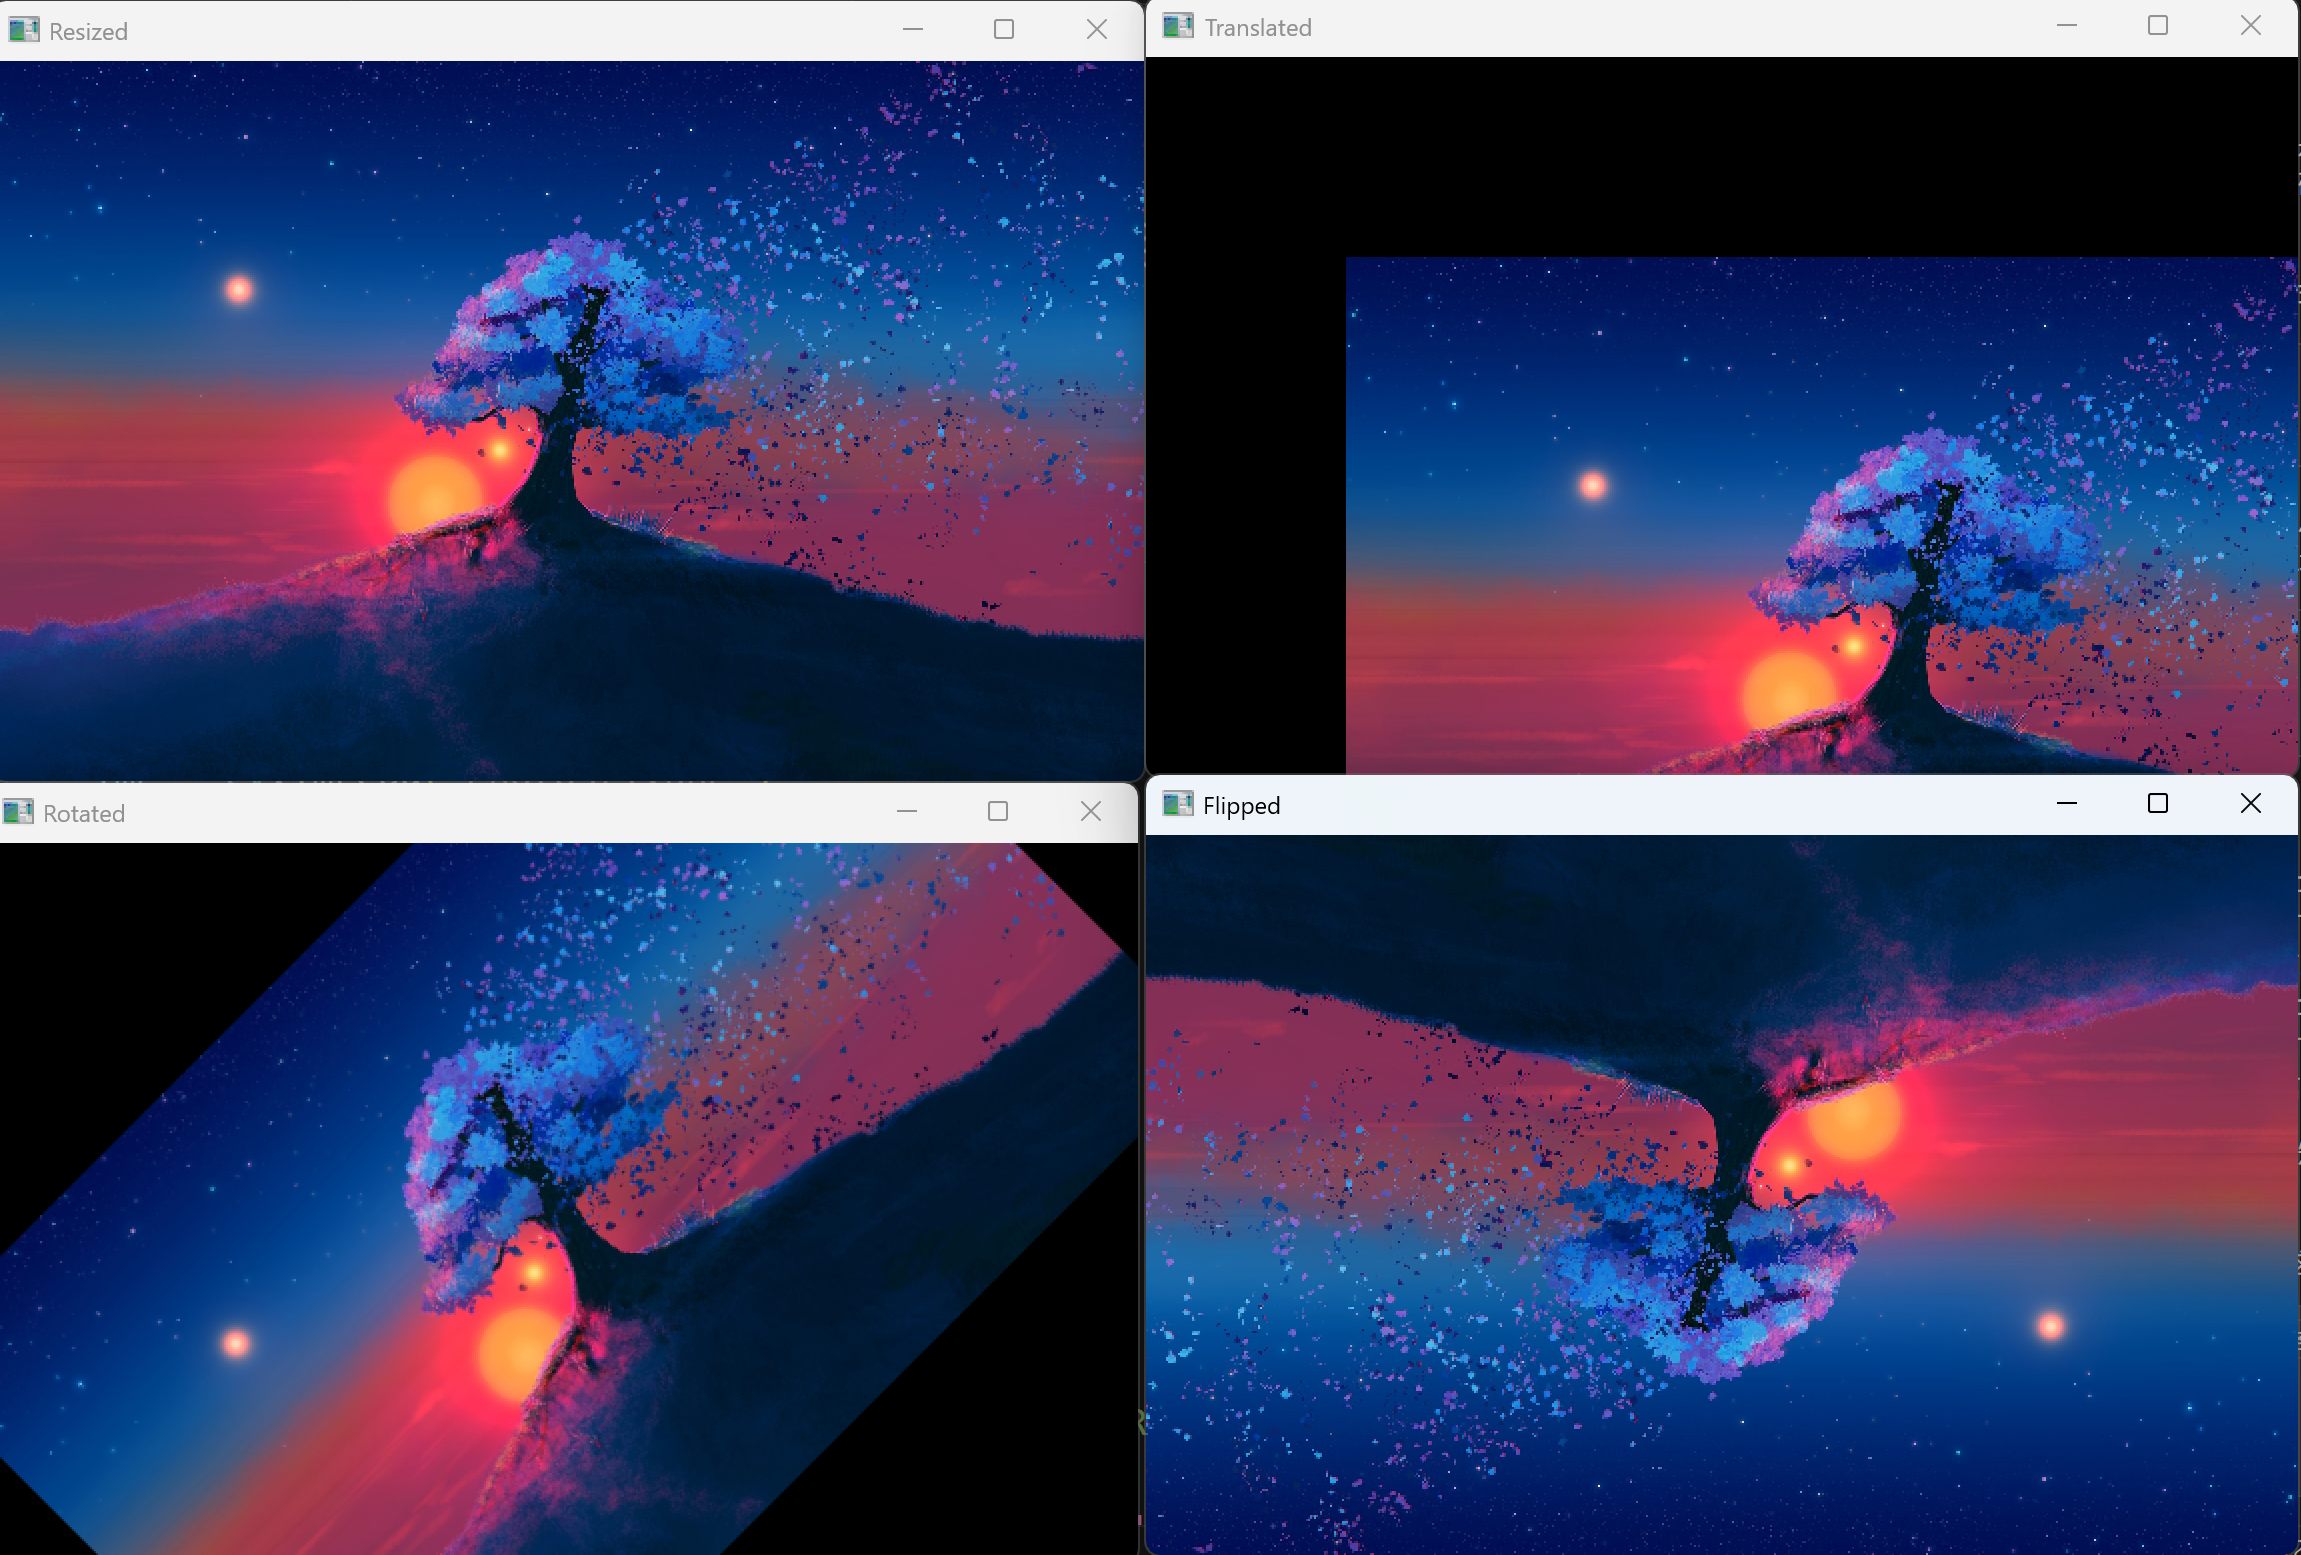

In [15]:
import cv2 as cv
import numpy as np

img = cv.imread("Photos/1.png")
# cv.imshow("image", img)

# resize 缩放
resized = cv.resize(img, None, fx=0.2, fy=0.2)
cv.imshow("Resized", resized)
img = resized


# Translation 平移
# x, y --> Translation
# 2x2 matrix --> Rotation Matrix
# 3x3 matrix --> Affine Transformation Matrix (Rotation + Translation)
def translate(img, x, y):
    transMat = np.float32([[1, 0, x], [0, 1, y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)


# -x --> Left
# -y --> Up
# x --> Right
# y --> Down
translated = translate(img, 100, 100)
cv.imshow("Translated", translated)


# Rotation 旋转
def rotate(img, angle, rotPoint=None):
    (h, w) = img.shape[:2]
    if rotPoint is None:
        rotPoint = (w // 2, h // 2)
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (w, h)
    return cv.warpAffine(img, rotMat, dimensions)


rotated = rotate(img, 45)
cv.imshow("Rotated", rotated)


# Flipping 翻转
# -1 --> Flip both
# 0 --> Flip vertically
# 1 --> Flip horizontally
flipped = cv.flip(img, -1)
cv.imshow("Flipped", flipped)


cv.waitKey(0)
cv.destroyAllWindows()